### __Understanding the Problem__
_What is Customer Churn?_

> It refers to the rate of attrition at which the customers stop doing business with an entity. In our case, we are interested in finding out the customers who discontinue their subscription services from our telecoms industry.

With this in mind, the report aims to go through the following specific objectives, which shall also serve as guide in the structure of our report:

1. __Define the Problem.__ Measure the customer churning problem at hand in terms of churn rate and revenue churned.
2. __Identify Causes for Churning.__ Determine the causes and intention of customers to discontinue their services.
3. __High-Value Customers vs Churned Customers.__ The former are highly valuable and loyal to the company for their large contribution to revenue generation. An assessment among these two customer types can be conducted to find out how churned customers can be effectively and prospectively converted to high-value customers.
4. __Propose Recommendations.__ Provide recommendations that are consistently valid and justified in line with Steps 2 and 3.

### Preparing the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.option_context('mode.use_inf_as_na', True)

In [2]:
df = pd.read_csv('C:/There/Stuff/Preset/telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
df.rename(lambda x: x.lower().strip().replace(' ','_'), axis='columns', inplace=True)
df.drop(columns=['customer_id', 'zip_code', 'latitude', 'longitude'], inplace=True)

##### __1. Define the Problem__
An __revenue loss of 3.68M__ (accounting for 17% of the total revenue) is expected due to __customer churn rate of 26.54%__ (1869 out of 7043 customers). There appears to be significantly more churn among low spending customers.

In [4]:
df['total_revenue'].sum()

21371131.69

In [5]:
df['customer_status'].count()

7043

In [6]:
df.groupby(['customer_status'])['total_revenue'].sum()

customer_status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: total_revenue, dtype: float64

In [7]:
df.groupby(['customer_status', 'gender']).size()

customer_status  gender
Churned          Female     939
                 Male       930
Joined           Female     211
                 Male       243
Stayed           Female    2338
                 Male      2382
dtype: int64

##### __2. Identify Causes for Churning__
Row labels attributed to customers who 'Joined' will not be included for analysis in order to reduce noise in the visualizations while allowing for effective visual contrast between customers who 'Churned' and those who 'Stayed'.

In [8]:
dfc = df.loc[df['customer_status'] != 'Joined']

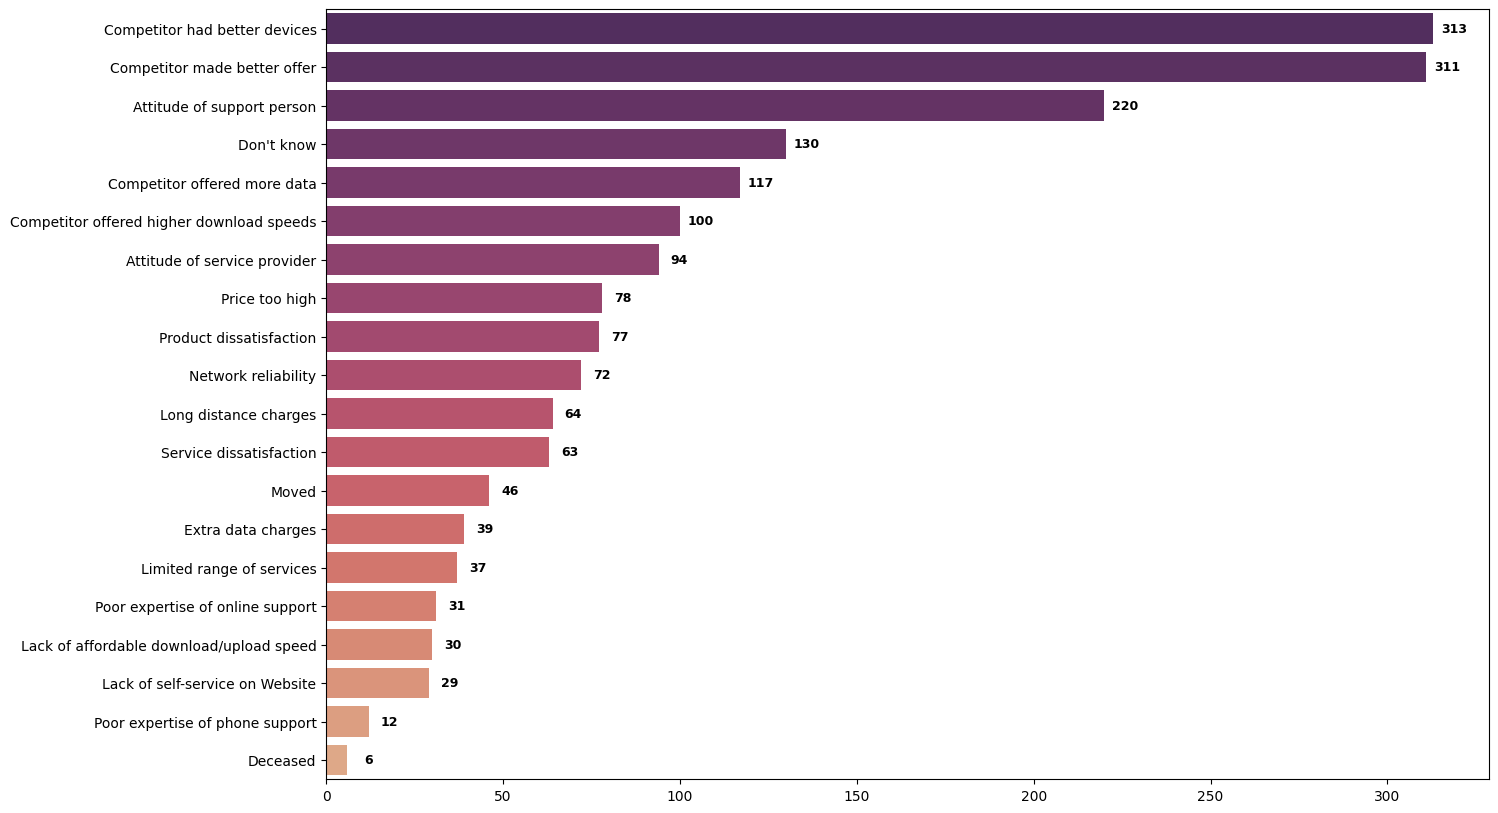

In [9]:
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(data=dfc, y=dfc['churn_reason'], order=dfc['churn_reason'].value_counts().index, palette='flare_r')
ax.set(xlabel= None, ylabel= None)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(15,0), weight='bold',
                fontsize=9, color='black', textcoords = 'offset points')

##### __2.5 EDA__

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

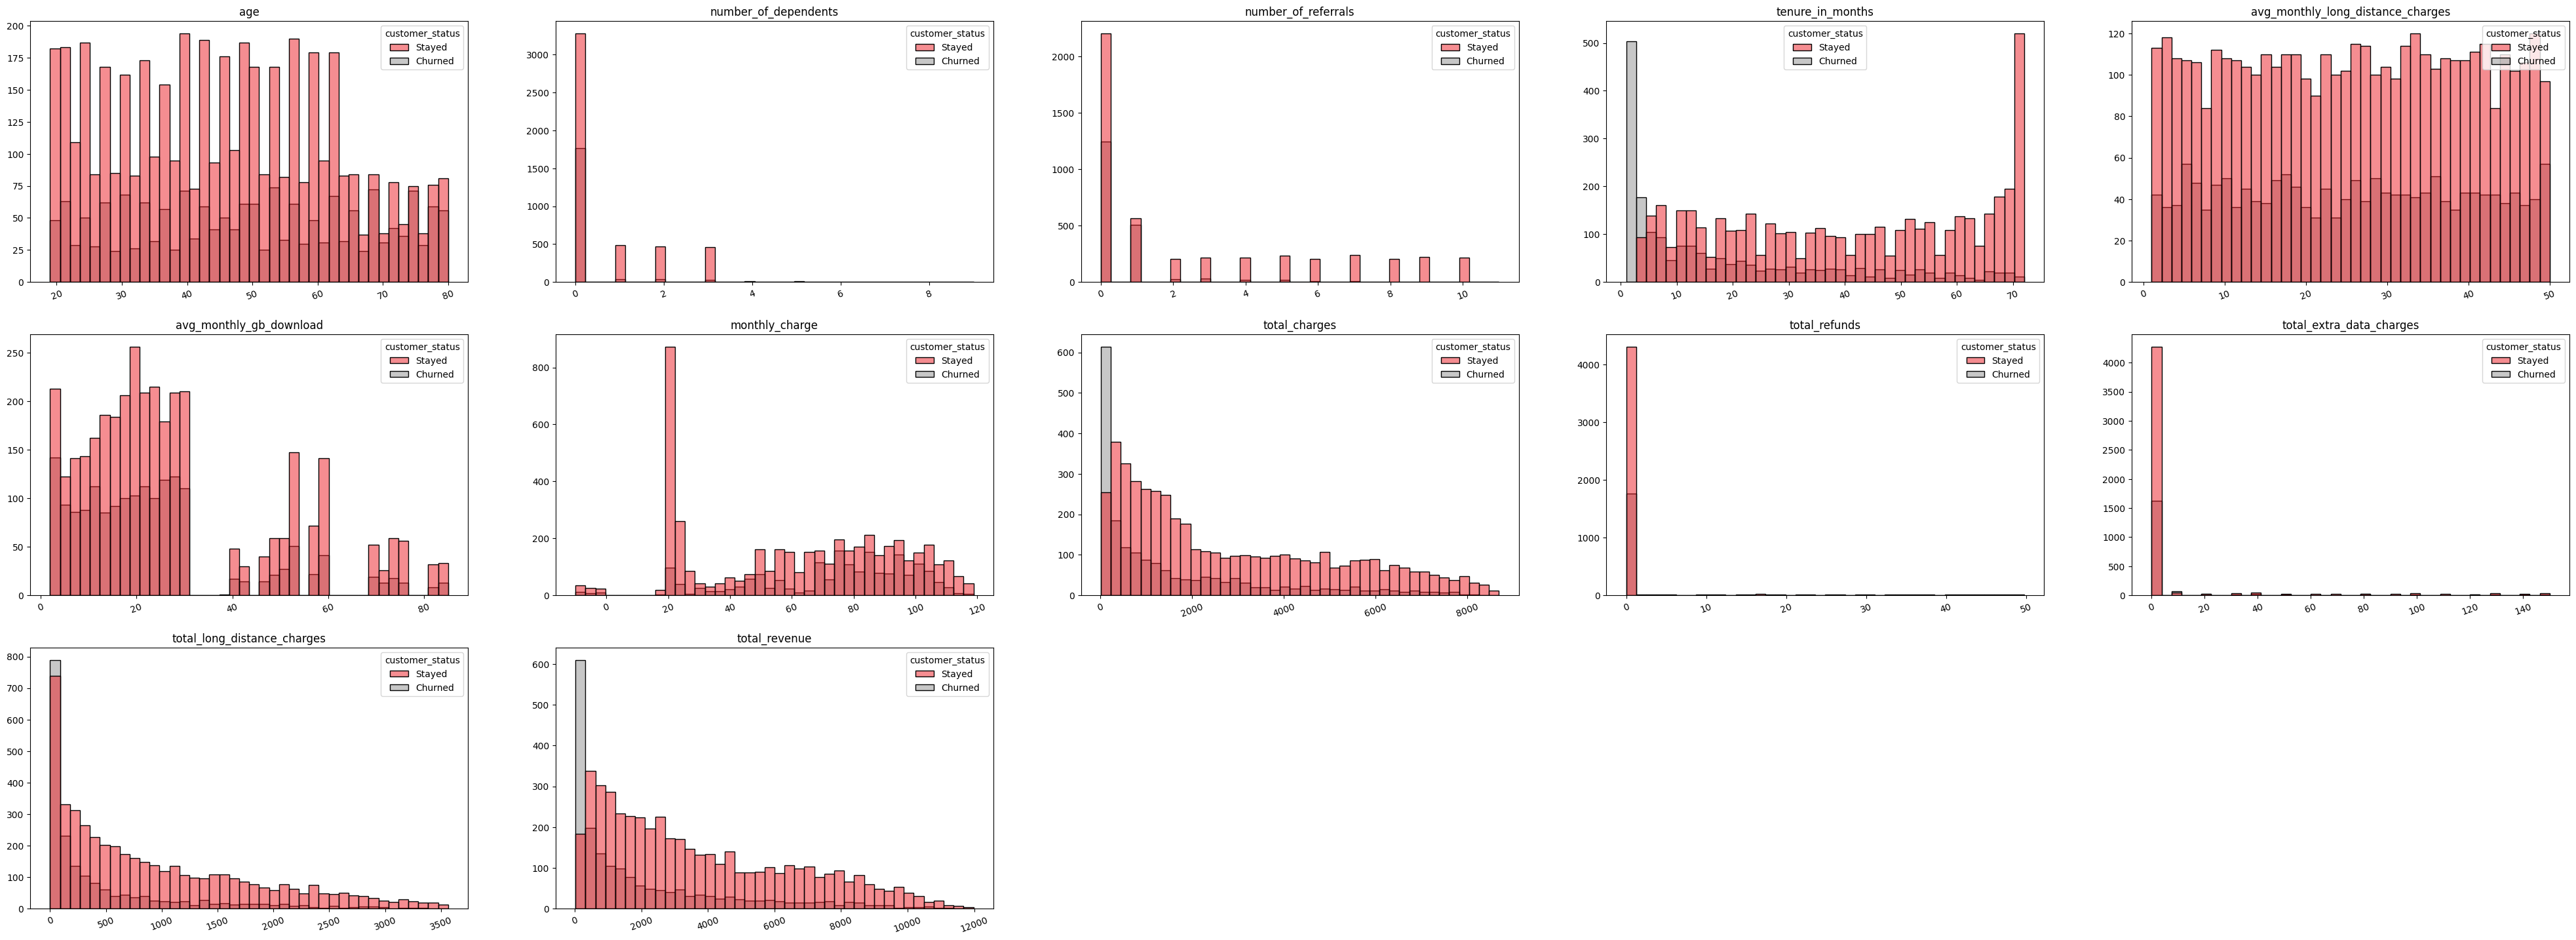

In [10]:
num = [cname for cname in dfc.columns if dfc[cname].dtype in ['int64', 'float64']]
dfc_num = dfc[num]

fig = plt.figure(figsize=(50,30))

i = 1
for n in dfc_num.columns:
    plt.subplot(5,5,i)
    ax = sns.histplot(x= dfc[n], hue= dfc['customer_status'], palette= ['#ED1C24', '#909090'], bins= 40)
    ax.set(xlabel= None, ylabel= None)
    plt.title(str(n), loc= None)
    plt.xticks(rotation= 20, fontsize= 10)
    i += 1

__Insights__
* `tenure_in_months`: Customer churn rate is highest within the first few months (5) of subscribing to the service.
* `total_charges and revenue`: In relation to their short duration of subscription, total amount charged to churned customers are relatively low compared to those who stayed, hence, lower revenue garnered.

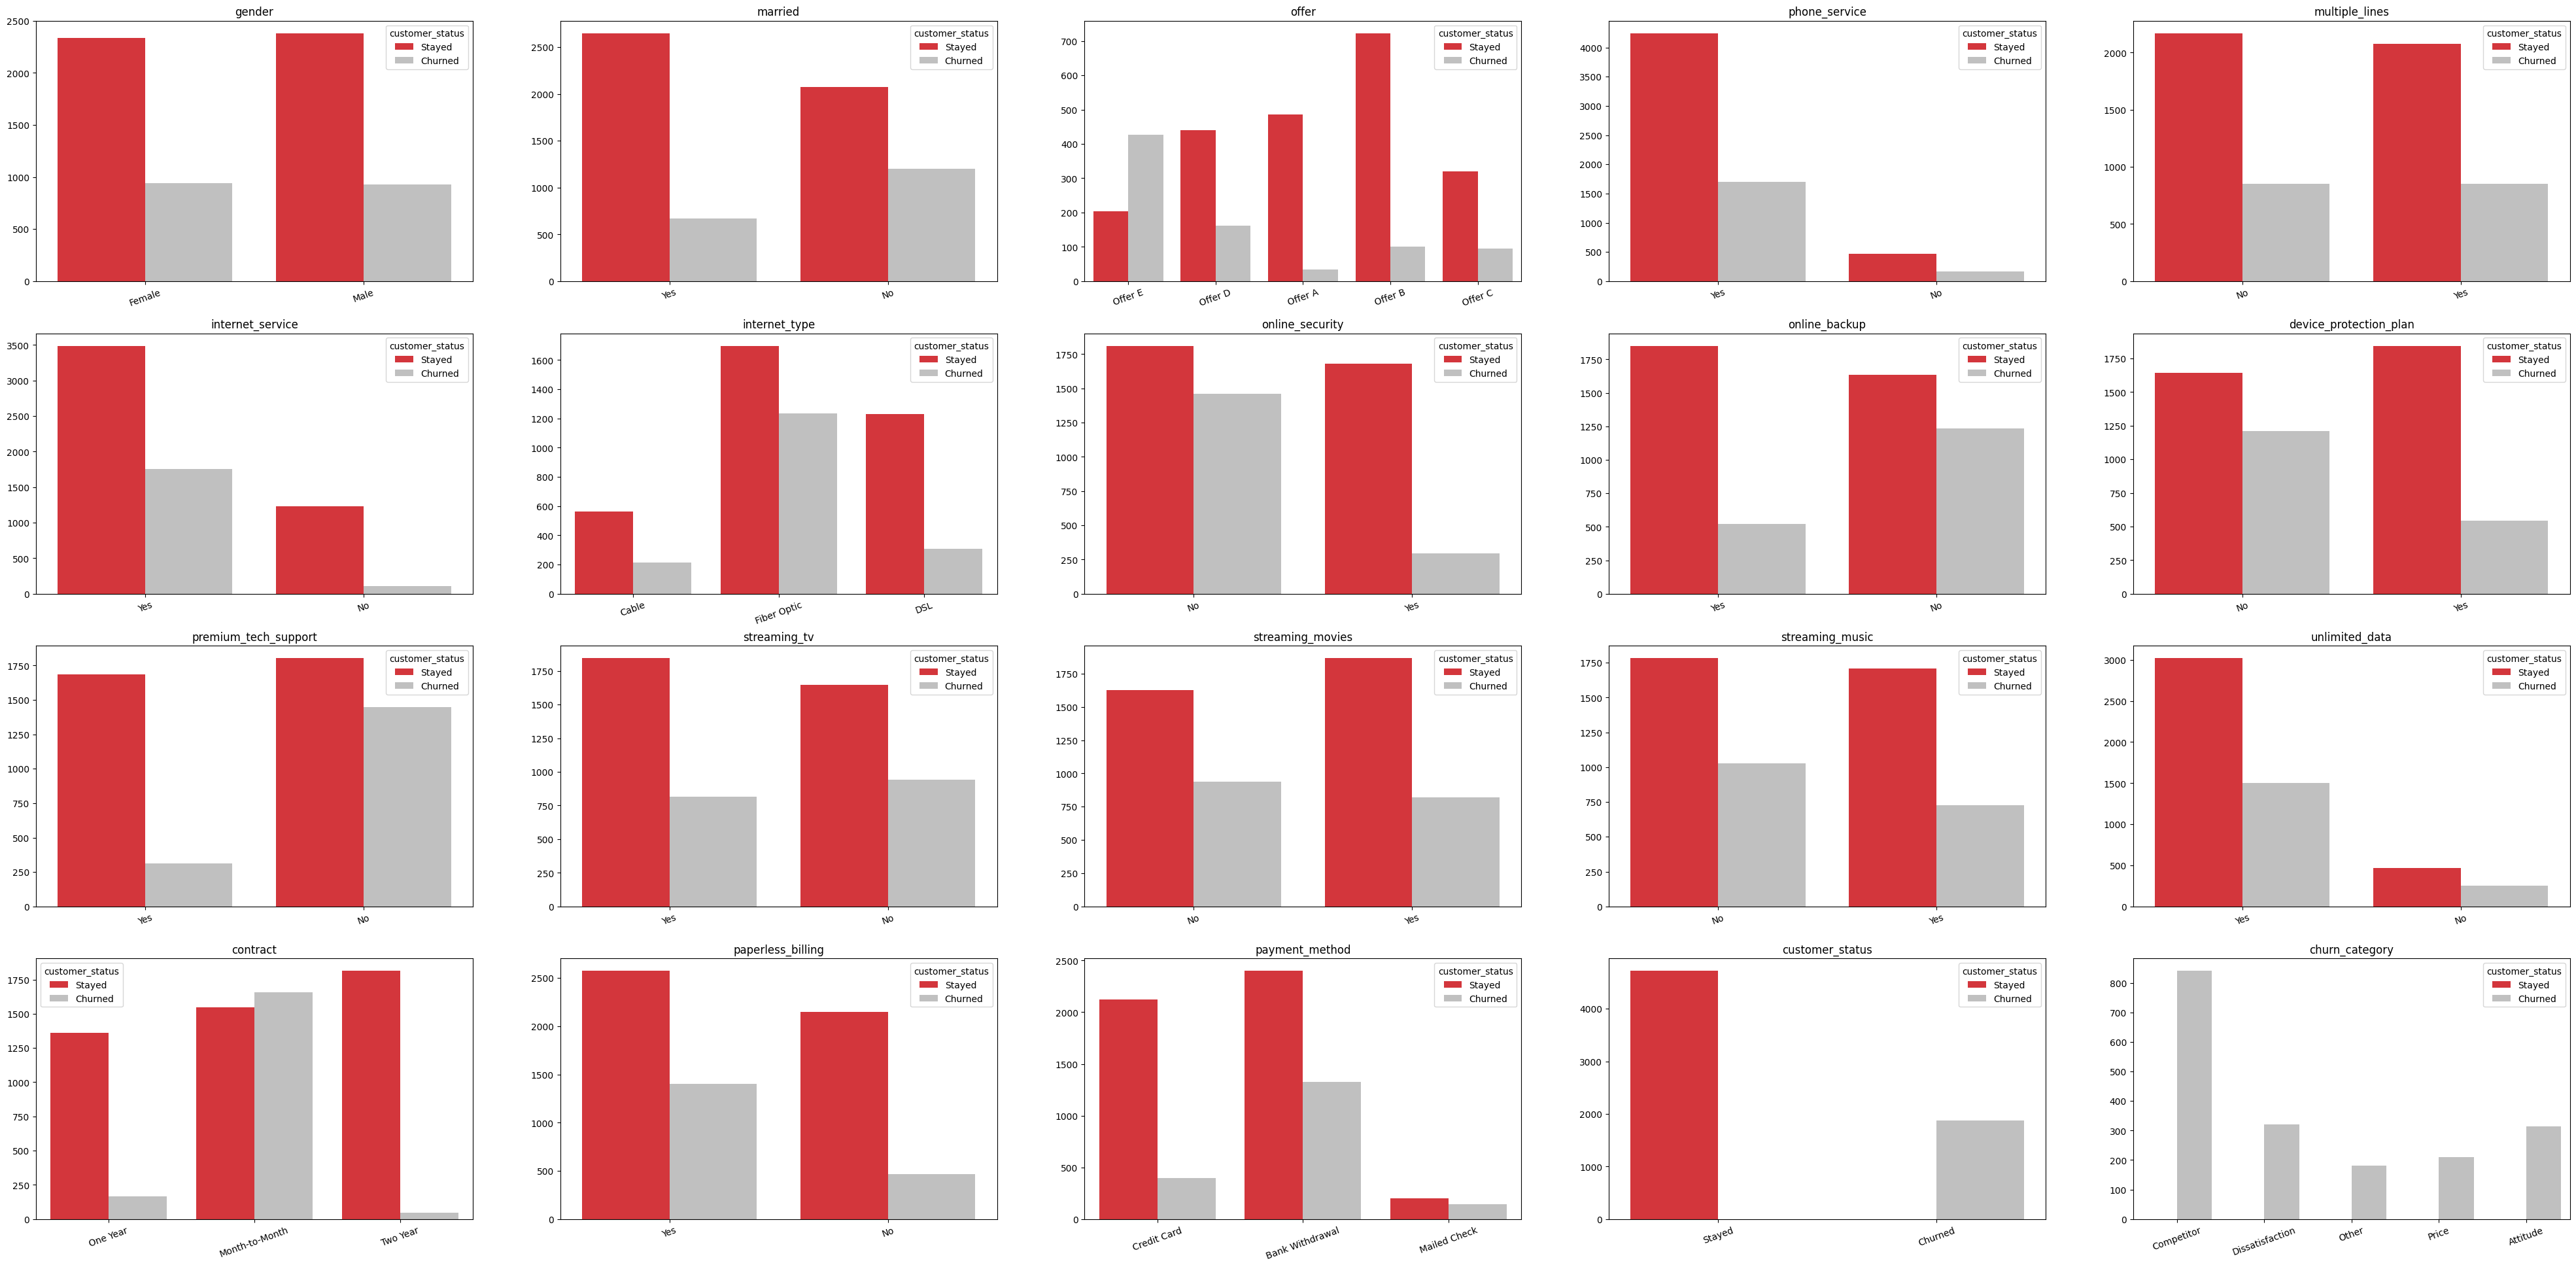

In [11]:
cat = [cname for cname in dfc.columns if dfc[cname].nunique() < 10 and dfc[cname].dtype == 'object']
dfc_cat = dfc[cat]

fig = plt.figure(figsize=(50,30))

i = 1
for c in dfc_cat.columns:
    plt.subplot(5,5,i)
    ax = sns.countplot(data=dfc_cat, x=dfc_cat[c], hue=dfc_cat['customer_status'], palette=['#ED1C24', '#C0C0C0'])
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')
    plt.xticks(rotation=20, fontsize=10)
    i += 1

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Temp\ipykernel_17816\74181272.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=dfc_cat, x=dfc_cat[c], y=dfc_cat['customer_status'], linewidth=4, markers='o', ci=None, color='#ED1C24')
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Temp\ipykernel_1

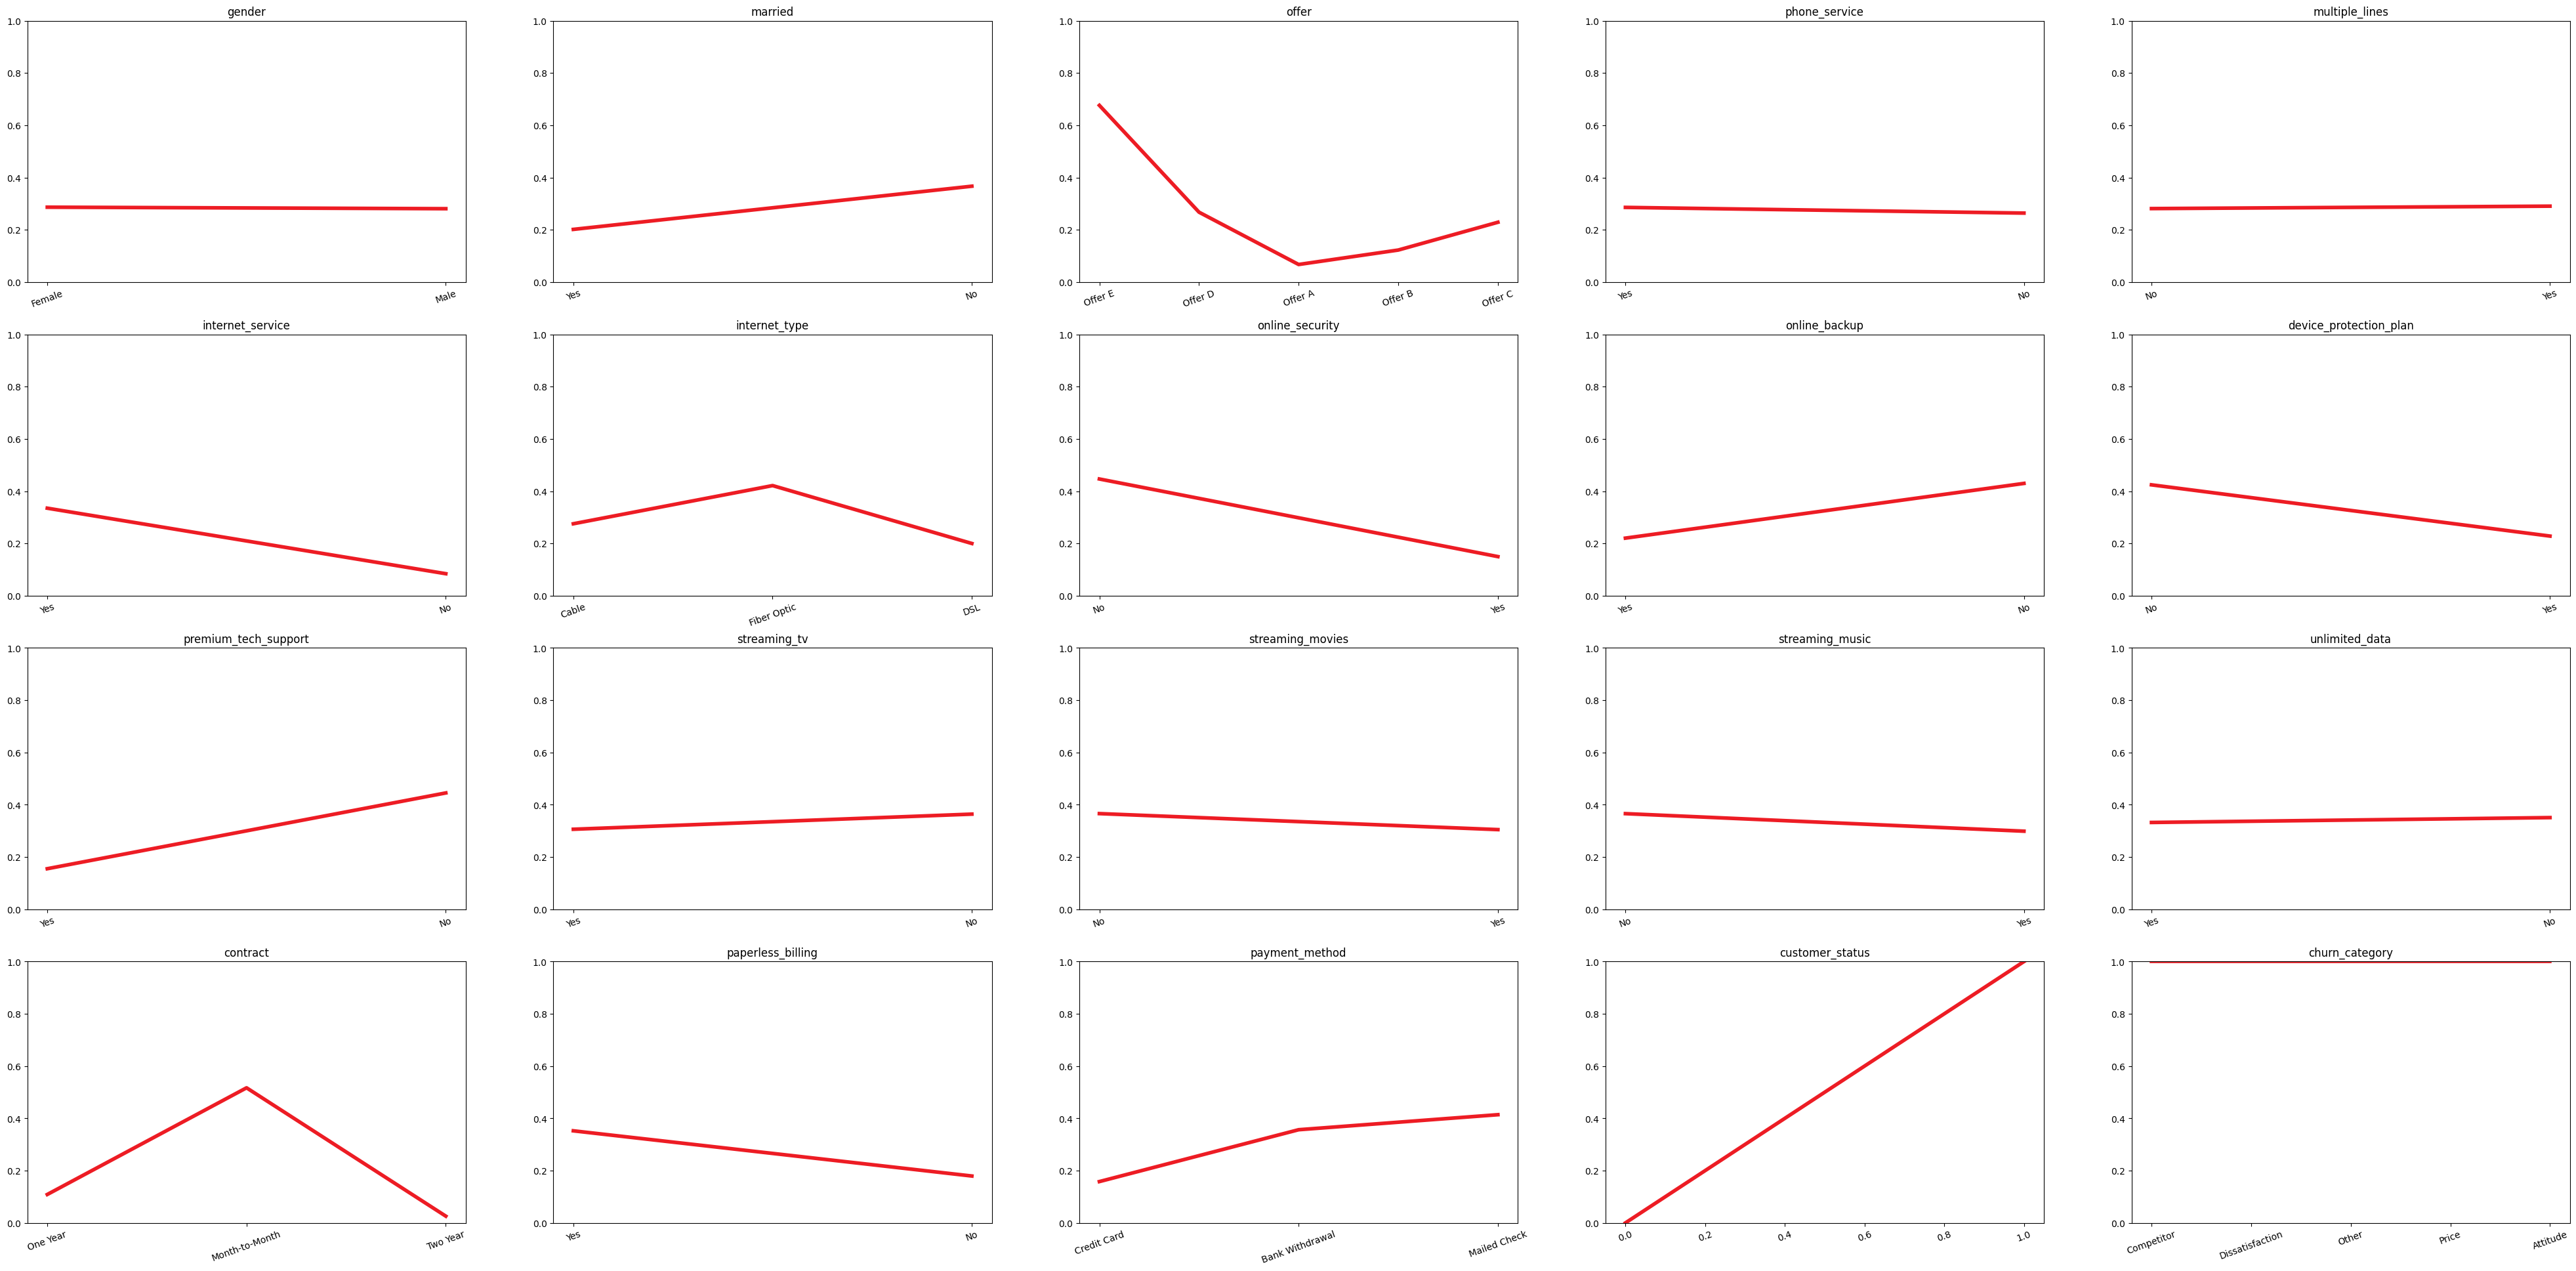

In [12]:
dfc.loc[dfc['customer_status'] == 'Stayed', 'customer_status'] = 0
dfc.loc[dfc['customer_status'] == 'Churned', 'customer_status'] = 1
dfc_cat = dfc[cat]
dfc_num = dfc[num]

fig = plt.figure(figsize=(50,30))

i = 1
for c in dfc_cat.columns:
    plt.subplot(5,5,i)
    ax = sns.lineplot(data=dfc_cat, x=dfc_cat[c], y=dfc_cat['customer_status'], linewidth=4, markers='o', ci=None, color='#ED1C24')
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')
    plt.ylim(0,1)
    plt.xticks(rotation=20, fontsize=10)
    i += 1

__Insights__
* `offer`: Most customers didn't accept marketing offers. The marketing team may want to improve on this low conversion rate. Unfortunately, no information were provided about the complete details of each offer, although we do observe high customer churn rate after subscribing to Offer E.
* `internet_service`. Higher churn rate with subscriptions to internet service. Anecdotally, there are several causes related to internet services that can lead to customer dissatisfaction. One of the most frequent examples include slow internet conncetion.
* `internet_type`: Of the various internet connection types, Fiber Optic is the most popular, for it had the fastest download and upload speeds compared to cable and DSL at the expense of higher prices. However, Fiber Optic users are also the most likely to discontinue the connection service.
* `contract`: It makes sense that contracts set for longer timeframes either up to one or two years discourage the subscribers to discontinue their service. On the contrary, users are likely to churn if they opt to pay at a monthly basis.
Subsribing to any of the additional internet services (i.e. online security, backup, device protection plan, etc.) appears to considerably reduce the customer churn rate by a certain percentage.

##### __3. High-Value Customers vs Churned Customers__
Customers who contributed above the average revenue of the company and those who stayed are treated as high-value and loyal customers.

In [13]:
dfc['total_revenue'].mean()

3235.2180816512373

In [14]:
dfc['high_value'] = 0
dfc.loc[(dfc['total_revenue'] > dfc['total_revenue'].mean()) & (dfc['customer_status'] == 0), 'high_value'] = 'High Value'


C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Temp\ipykernel_17816\2782770607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['high_value'] = 0
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Temp\ipykernel_17816\2782770607.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'High Value' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfc.loc[(dfc['total_revenue'] > dfc['total_revenue'].mean()) & (dfc['customer_status'] == 0), 'high_value'] = 'High Value'


High value customers belong to the top __33.34%.__

In [15]:
dfc['high_value'].value_counts()

high_value
0             4392
High Value    2197
Name: count, dtype: int64

In [16]:
df_high_value = dfc[dfc['high_value'] == 'High Value']

##### __High-Value Customers Profile__

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\s

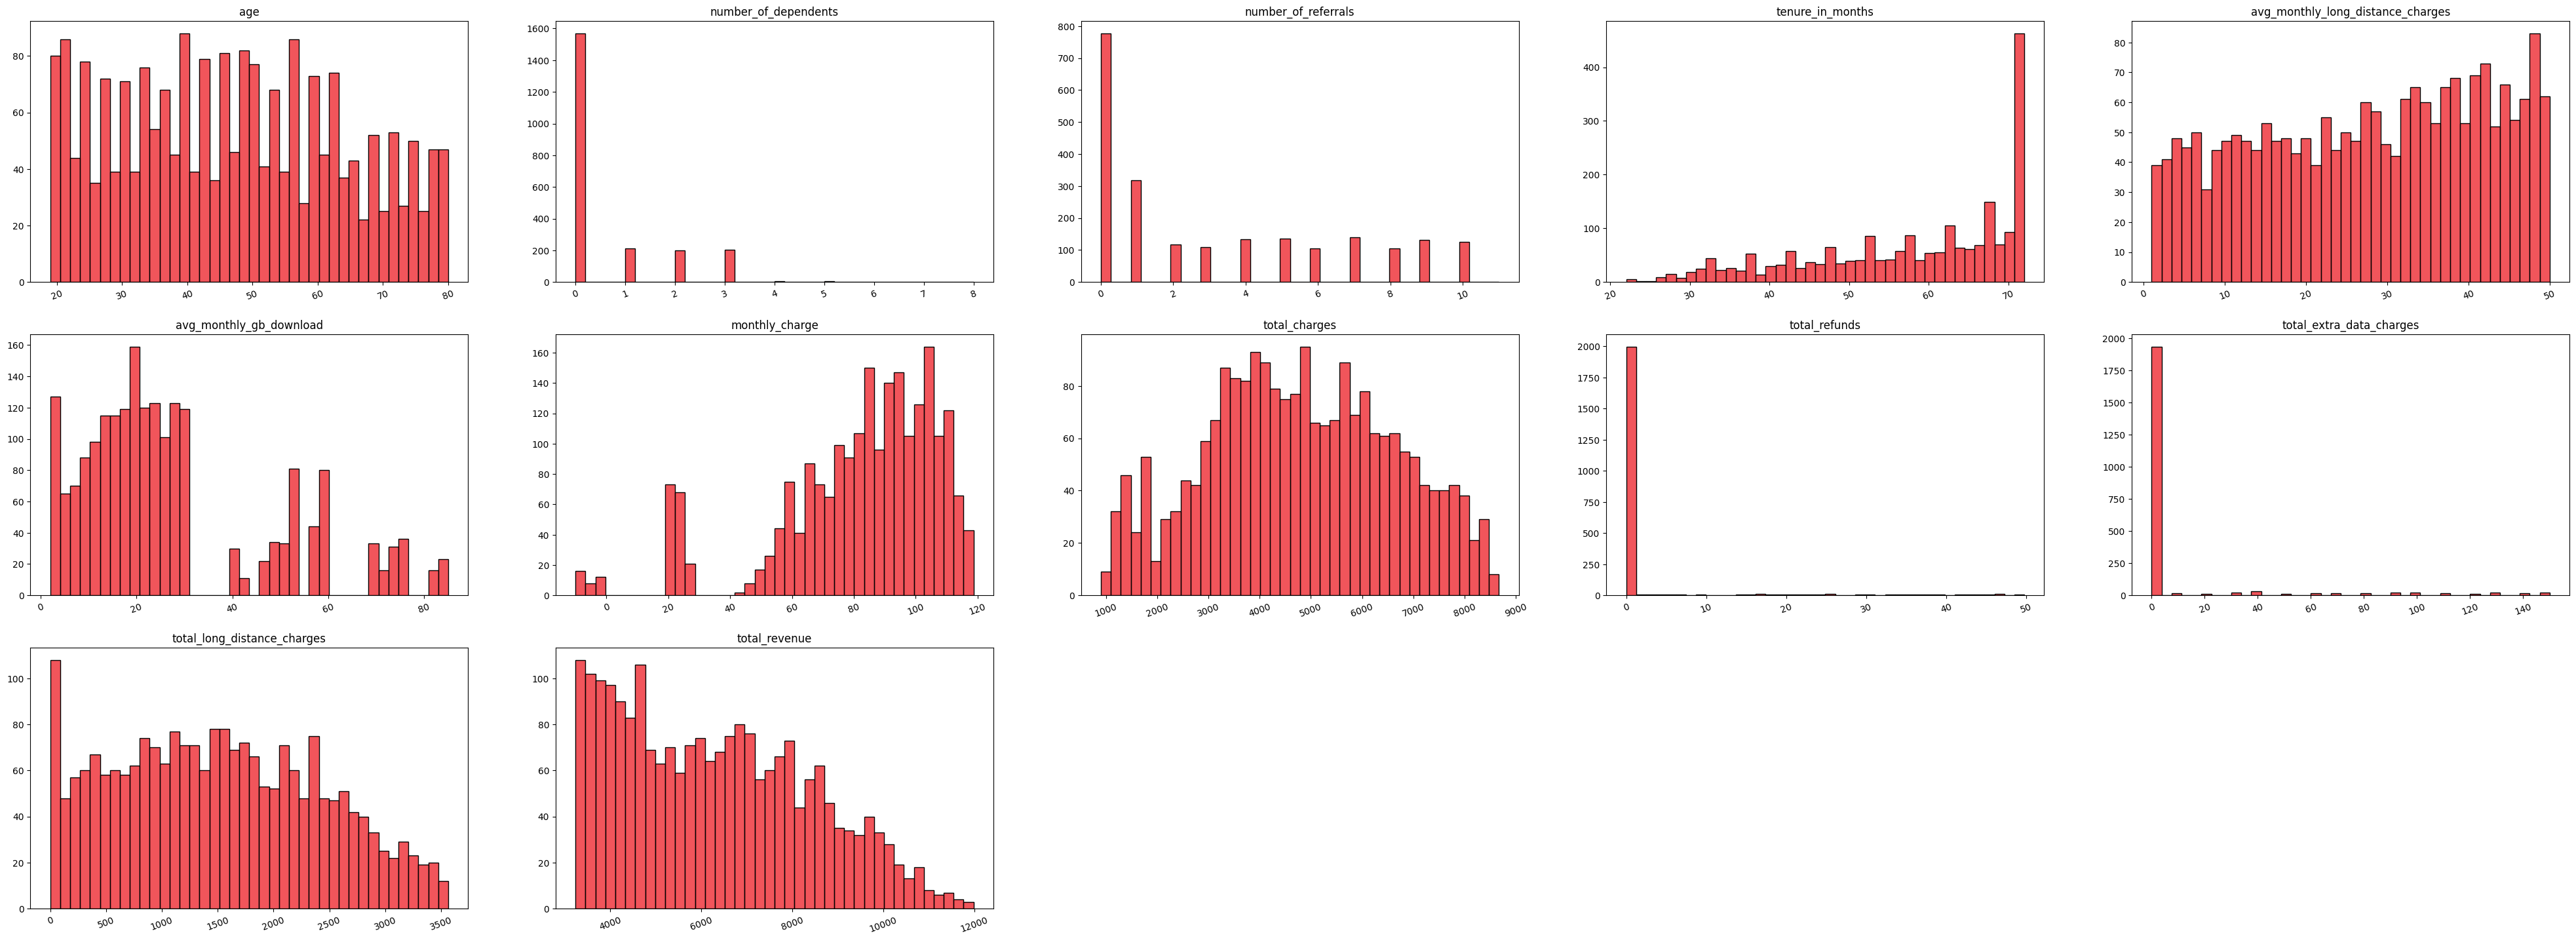

In [17]:
num = [cname for cname in df_high_value.columns if df_high_value[cname].dtype in ['int64', 'float64']]
_ = df_high_value[num]

fig = plt.figure(figsize=(50,30))

i = 1
for n in _.columns:
    plt.subplot(5,5,i)
    ax = sns.histplot(x= df_high_value[n], color= '#ED1C24', bins= 40)
    ax.set(xlabel= None, ylabel= None)
    plt.title(str(n), loc= None)
    plt.xticks(rotation= 20, fontsize= 10)
    i += 1